Import necessary libraries

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#ImageDataGenerator to download and preprocess Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_dir = "Cars Dataset/train"
test_dir = "Cars Dataset/test"

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Standardlization for the pixels
    rotation_range=10,
    horizontal_flip=True,
    validation_split=0.2  # Scale for validation
)
test_datagen = ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=True,
    rescale=1./255  # Standardlization for the pixels
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Size input image
    batch_size=32,
    class_mode='categorical',  
    subset='training'  #trainning 
)
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  
    batch_size=32,
    class_mode='categorical',  # Phân loại nhiều lớp
    subset='validation'  # Dữ liệu validation
)

# Tạo generator cho dữ liệu kiểm tra
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),  # Kích thước ảnh đầu vào
    batch_size=32,
    class_mode='categorical'  # Phân loại nhiều lớp
)

Found 2684 images belonging to 7 classes.
Found 668 images belonging to 7 classes.
Found 822 images belonging to 7 classes.


In [6]:
train_generator[0]

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [7]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, Flatten, Dense, Dropout, Input, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [8]:
def create_model():
    # Định nghĩa đầu vào
    inputs = Input(shape=(128, 128, 3))
    
    # Thêm các lớp
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.40)(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(7, activation='softmax')(x)
    
    # Tạo mô hình
    model = Model(inputs=inputs, outputs=outputs)
    
    return model

# Tạo mô hình
model = create_model()

# Xem thông tin mô hình
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,397,191 (28.22 MB)

 Trainable params: 7,396,935 (28.22 MB)

 Non-trainable params: 256 (1.00 KB)

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_generator,
    epochs=20,
    validation_data=validation_generator
         )

Epoch 1/20


C:\Users\x\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


84/84 ━━━━━━━━━━━━━━━━━━━━ 56s 597ms/step - accuracy: 0.2529 - loss: 1.9693 - val_accuracy: 0.3623 - val_loss: 2.0640
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 17s 199ms/step - accuracy: 0.4499 - loss: 1.5411 - val_accuracy: 0.3683 - val_loss: 1.7191
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 16s 177ms/step - accuracy: 0.4953 - loss: 1.4001 - val_accuracy: 0.4012 - val_loss: 1.5959
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 16s 185ms/step - accuracy: 0.5905 - loss: 1.1895 - val_accuracy: 0.3234 - val_loss: 1.8784
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 16s 177ms/step - accuracy: 0.6204 - loss: 1.1009 - val_accuracy: 0.6093 - val_loss: 1.1308
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 16s 179ms/step - accuracy: 0.6666 - loss: 0.9704 - val_accuracy: 0.5299 - val_loss: 1.3400
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 16s 178ms/step - accuracy: 0.6875 - loss: 0.8980 - val_accuracy: 0.5374 - val_loss: 1.4248
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 16s 180ms/step - accuracy: 0.7003 - loss: 0.8216 - val_accuracy: 0.643

In [11]:
test_loss, test_acc = model.evaluate(test_generator)


26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - accuracy: 0.6928 - loss: 1.2381


In [12]:
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')

Test loss: 1.1883292198181152
Test accuracy: 0.6946471929550171


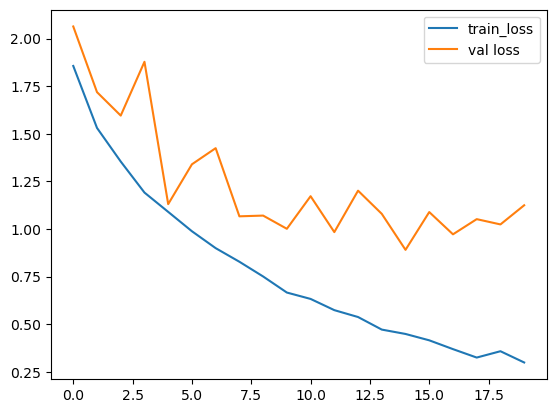

In [13]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label ='val loss')
plt.legend()
plt.show()

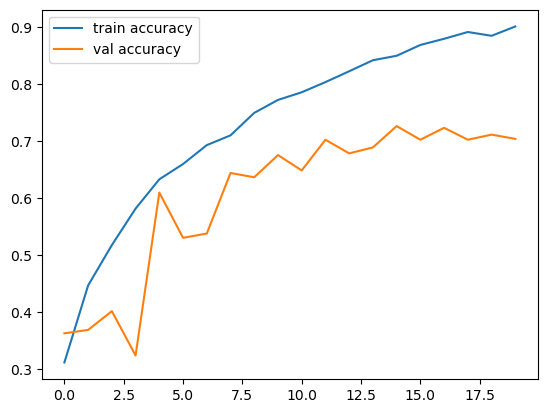

In [14]:
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label ='val accuracy')
plt.legend()
plt.show()

(32, 128, 128, 3)
(32, 7)


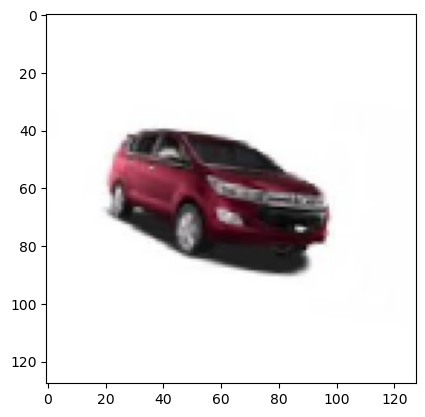

In [15]:
images, labels = test_generator[0]

# Kiểm tra kích thước
print(images.shape)  # Batch gồm 32 ảnh có kích thước 150x150x3
print(labels.shape)  # Batch gồm 32 nhãn, tương ứng với 7 lớp

# Hiển thị ảnh đầu tiên trong batch
plt.imshow(images[0])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


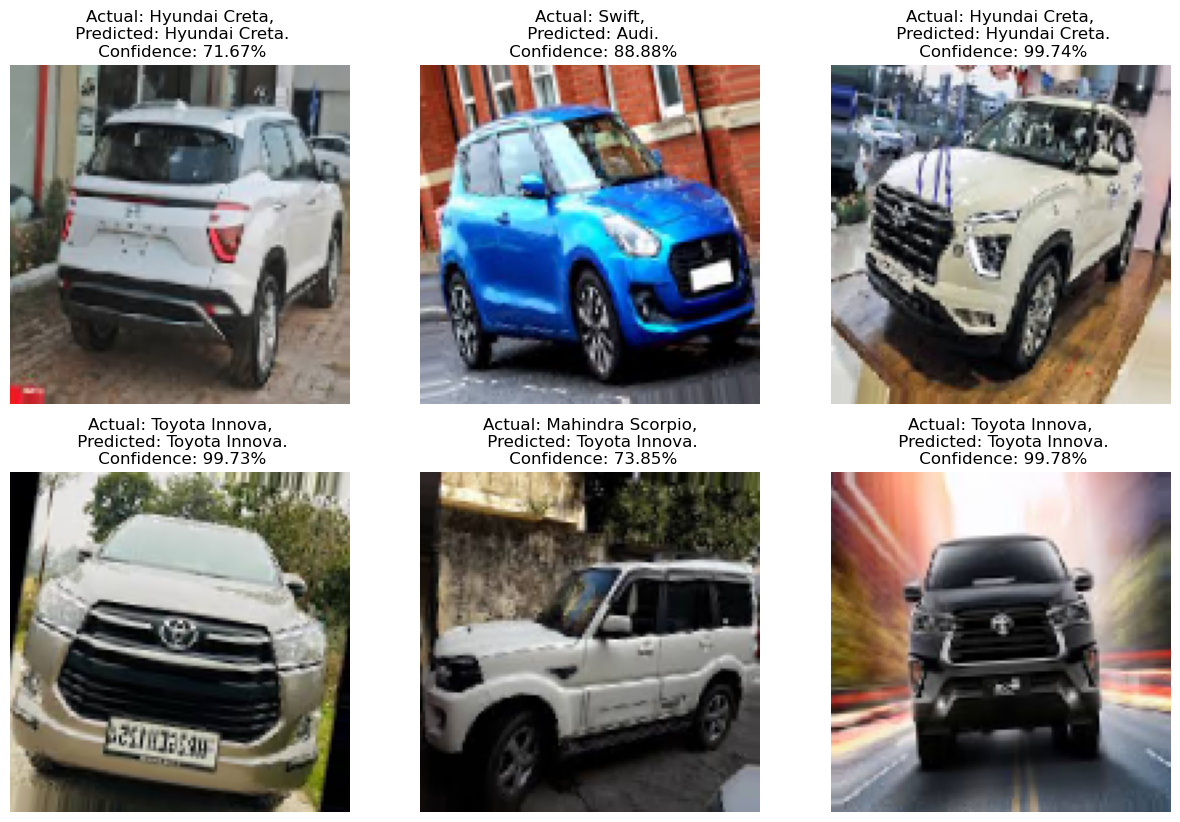

In [16]:
plt.figure(figsize=(15, 15))
class_names = list(train_generator.class_indices.keys())
class_names
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    #Ảnh đang ở 3 chiều , sử dụng expand để thêm một 
    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(np.argmax(labels[i]))]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

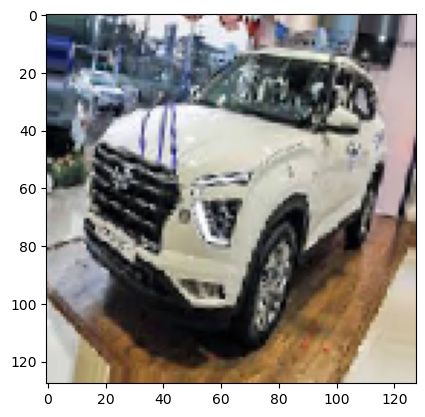

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
('Toyota Innova', 98.48)
Actual:  Audi


In [17]:
plt.imshow(images[2])
plt.show()
class_names = list(train_generator.class_indices.keys())
class_names

    
for images, labels in test_generator:
    
    print(predict(model, images[2]))
    actual_class = class_names[int(np.argmax(labels[2]))]
    print("Actual: ",actual_class)
    break;

In [18]:
from tensorflow.keras.utils import plot_model

def visualize_model_architecture(model, filename="C:\\Users\\x\\Desktop\\DataSciecnee\\Section 45. CNN\\Car Classification\\Cars Dataset\\test\\Audi\\04d90193-20220222_021909.jpg"):
    # Vẽ sơ đồ kiến trúc của mô hình
    plot_model(model, to_file=filename, show_shapes=True, show_layer_names=True)
    print(f'Model architecture is saved as {filename}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


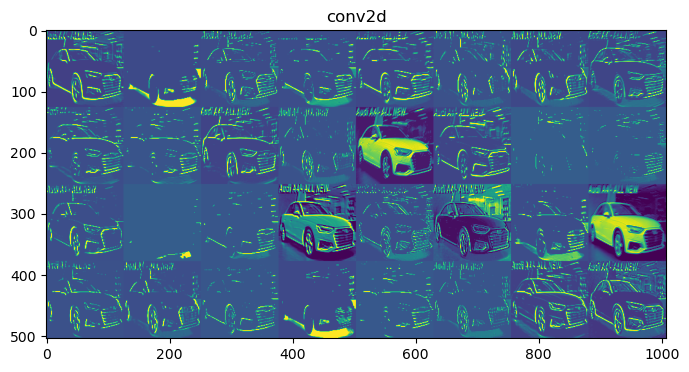

C:\Users\x\AppData\Local\Temp\ipykernel_9012\187192676.py:41: RuntimeWarning: invalid value encountered in divide
  filter_image /= filter_image.std()
C:\Users\x\AppData\Local\Temp\ipykernel_9012\187192676.py:44: RuntimeWarning: invalid value encountered in cast
  filter_image = np.clip(filter_image, 0, 255).astype('uint8')


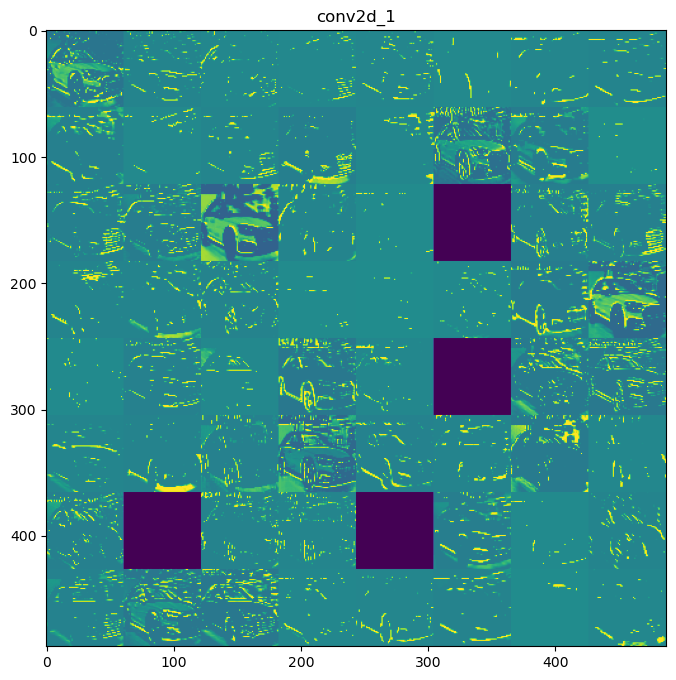

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
image_path = 'C:\\Users\\x\\Desktop\\DataSciecnee\\Section 45. CNN\\Car Classification\\Cars Dataset\\test\\Audi\\04d90193-20220222_021909.jpg'
def visualize_feature_maps(model, image_path):
    # Load ảnh từ đường dẫn và resize về kích thước phù hợp (128x128)
    img = Image.open(image_path).resize((128, 128))
    
    # Chuyển ảnh sang array và chuẩn hóa dữ liệu
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Thêm batch dimension
    img_array /= 255.0  # Chuẩn hóa ảnh về khoảng [0, 1]

    # Tạo mô hình từ model hiện có với đầu ra là các lớp convolutional
    layer_outputs = [layer.output for layer in model.layers if isinstance(layer, Conv2D)]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)
    
    # Truyền ảnh qua các lớp convolutional
    activations = activation_model.predict(img_array)
    
    layer_names = [layer.name for layer in model.layers if isinstance(layer, Conv2D)]

    for layer_name, layer_activation in zip(layer_names, activations):
        # Lấy số lượng filters
        num_filters = layer_activation.shape[-1]
        
        # Hiển thị từng filter của layer
        size = layer_activation.shape[1]
        num_cols = num_filters // 8  # Hiển thị 8 filters mỗi hàng
        display_grid = np.zeros((size * num_cols, size * 8))
        
        for col in range(num_cols):
            for row in range(8):
                filter_index = col * 8 + row
                if filter_index < num_filters:
                    filter_image = layer_activation[0, :, :, filter_index]
                    # Chuẩn hóa filter
                    filter_image -= filter_image.mean()
                    filter_image /= filter_image.std()
                    filter_image *= 64
                    filter_image += 128
                    filter_image = np.clip(filter_image, 0, 255).astype('uint8')
                    display_grid[col * size : (col + 1) * size,
                                 row * size : (row + 1) * size] = filter_image
        
        # Vẽ grid của layer
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        plt.show()
visualize_feature_maps(model, image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


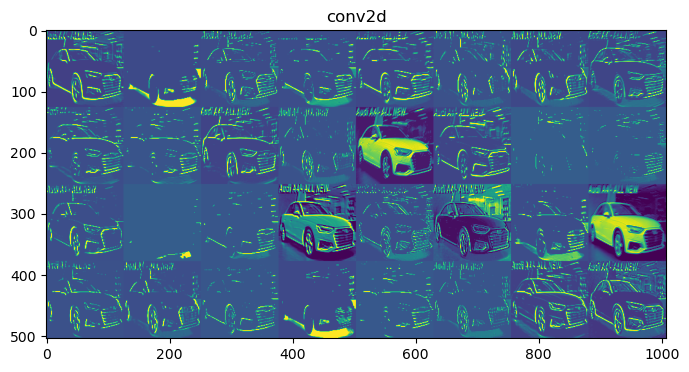

C:\Users\x\AppData\Local\Temp\ipykernel_9012\187192676.py:41: RuntimeWarning: invalid value encountered in divide
  filter_image /= filter_image.std()
C:\Users\x\AppData\Local\Temp\ipykernel_9012\187192676.py:44: RuntimeWarning: invalid value encountered in cast
  filter_image = np.clip(filter_image, 0, 255).astype('uint8')


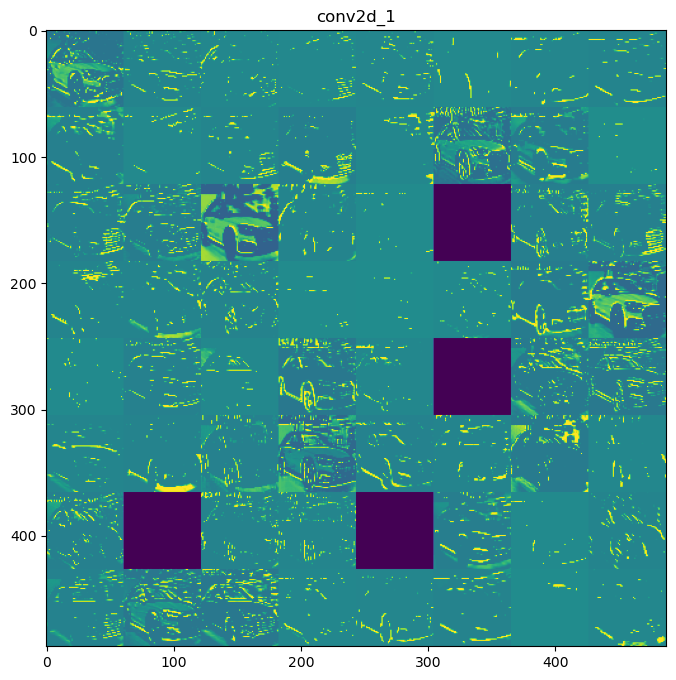

In [20]:
# Đường dẫn ảnh
image_path = 'C:\\Users\\x\\Desktop\\DataSciecnee\\Section 45. CNN\\Car Classification\\Cars Dataset\\test\\Audi\\04d90193-20220222_021909.jpg'

# Gọi hàm visualize
visualize_feature_maps(model, image_path)


In [21]:
#Now we train with transfer learning MobileNetV2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [22]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128 , 3))

In [23]:
base_model.trainable = False

In [24]:
# Thêm các lớp phía trên (các lớp fully connected)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Thêm dropout để giảm overfitting
predictions = Dense(7, activation='softmax')(x)  # Số lớp tương ứng với số nhãn


ValueError: Only input tensors may be passed as positional arguments. The following argument value should be passed as a keyword argument: <BatchNormalization name=batch_normalization_1, built=False> (of type <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'>)

In [ ]:
# Tạo mô hình hoàn chỉnh
model_tran = Model(inputs=base_model.input, outputs=predictions)

# Compile mô hình
model_tran.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history_tran = model_tran.fit(train_generator, epochs=20, validation_data=validation_generator)

In [ ]:
plt.figure(figsize=(15, 15))
class_names = list(train_generator.class_indices.keys())
class_names
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model_tran, images[i])
        actual_class = class_names[int(np.argmax(labels[i]))]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [ ]:
plt.plot(history_tran.history['accuracy'], label = 'train accuracy')
plt.plot(history_tran.history['val_accuracy'], label ='val accuracy')
plt.legend()
plt.show()

In [ ]:
plt.plot(history_tran.history['loss'], label = 'train_loss')
plt.plot(history_tran.history['val_loss'], label ='val loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model_tran.evaluate(test_generator)


In [ ]:
#Now we try with VGG16 
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))



In [ ]:
base_model_vg = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
for layer in base_model_vg.layers:
    layer.trainable = False


In [ ]:
model_vg = Sequential([
    base_model_vg,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(7, activation='softmax')  # 7 lớp đầu ra cho bài toán phân loại 8 hãng xe
])


In [ ]:
model_vg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_vg = model_vg.fit(train_generator, epochs=20, validation_data=validation_generator)

In [ ]:
test_loss, test_acc = model_vg.evaluate(test_generator)

In [ ]:
plt.plot(history_vg.history['accuracy'], label = 'train accuracy')
plt.plot(history_vg.history['val_accuracy'], label ='val accuracy')
plt.legend()
plt.show()

In [ ]:
plt.plot(history_vg.history['loss'], label = 'train_loss')
plt.plot(history_vg.history['val_loss'], label ='val loss')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15, 15))
class_names = list(train_generator.class_indices.keys())
class_names
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model_vg, images[i])
        actual_class = class_names[int(np.argmax(labels[i]))]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break